In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import typing as T
from tqdm import tqdm
import torch
import numpy as np

from evo.dataset import FastaDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Pfam

In [5]:
# take a subset of the whole database

# fasta_file: str = "/shared/amyxlu/data/uniref90/uniref90.fasta" 
fasta_file: str = "/data/lux70/data/pfam/Pfam-A.fasta"

def get_lengths(fasta_file, subset_size=5000):
    dataset = FastaDataset(fasta_file, cache_indices=True)
    print("Full dataset length:", len(dataset))

    indices = torch.randperm(len(dataset))[:subset_size]  # Get random indices for the subset
    subset = torch.utils.data.Subset(dataset, indices)  # Create the subset
    print("Subset length:", len(subset))  # Print the length of the subset

    lengths = [len(subset[i][1]) for i in range(len(subset))] 
    return np.array(lengths)

Full dataset length: 52786549
Subset length: 20000


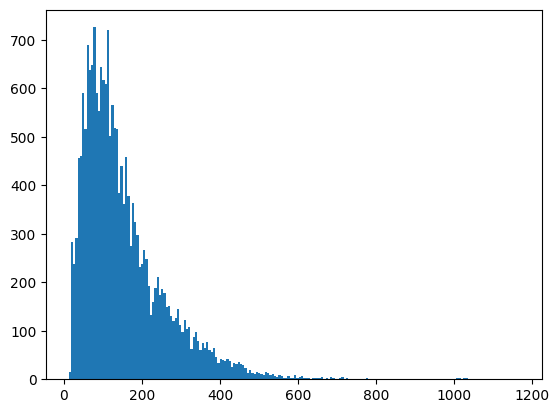

In [41]:
fasta_file: str = "/data/lux70/data/pfam/Pfam-A.fasta"
pfam_lengths = get_lengths(fasta_file, subset_size=20000) 
_ = plt.hist(pfam_lengths, bins=200)

# PDB

Full dataset length: 929585
Subset length: 20000


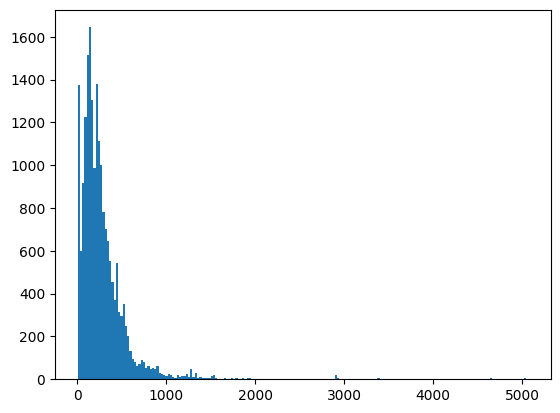

In [42]:
fasta_file = "/data/lux70/data/pdb/pdb_seqres.txt"
pdb_lengths = get_lengths(fasta_file, subset_size=20000) 
_ = plt.hist(pdb_lengths, bins=200)

# Plots

In [43]:
assert len(pdb_lengths) == len(pfam_lengths)

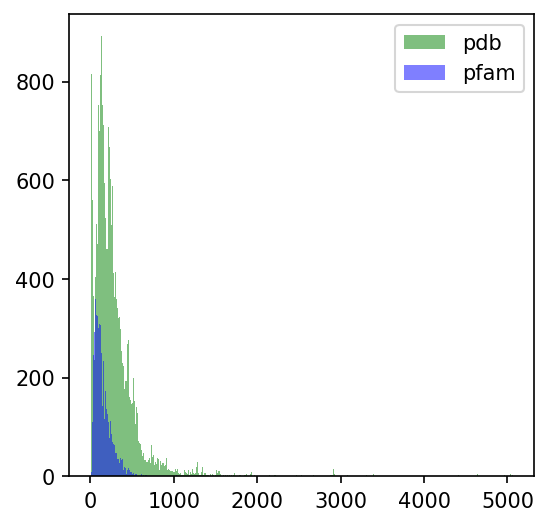

In [44]:
fig, ax = plt.subplots(1,1,figsize=(4,4),dpi=150)

ax.hist(pdb_lengths,bins=400, color='green',alpha=0.5, label="pdb")
ax.hist(pfam_lengths,bins=400, color='blue', alpha=0.5, label="pfam")
# ax.set_xlim(0,700)
plt.legend()
plt.show()

/tmp/ipykernel_1482561/1562893233.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(powers)


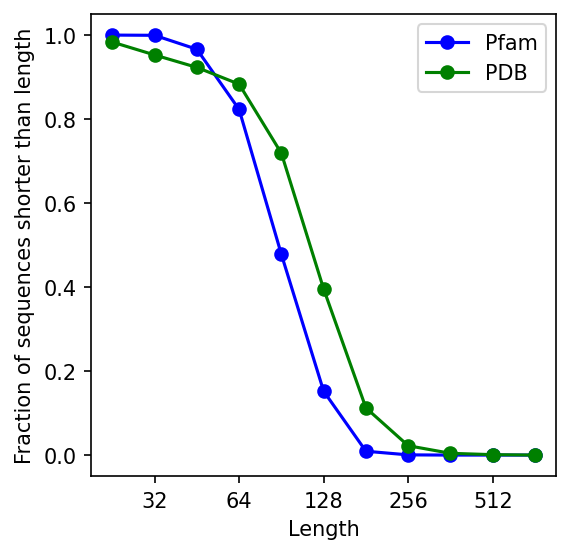

In [46]:
def calc_frac_shorter_than(lengths):
    powers = [2**i for i in range(3, 14)]
    frac_shorter_than = []
    for maxlen in powers:
        frac_shorter_than.append(np.sum(maxlen < lengths) / len(lengths))
    return powers, frac_shorter_than

powers, pfam_frac_shorter_than = calc_frac_shorter_than(pfam_lengths)
powers, pdb_frac_shorter_than = calc_frac_shorter_than(pdb_lengths)

fig, ax = plt.subplots(1,1,figsize=(4,4), dpi=150)
ax.plot(powers, pfam_frac_shorter_than, marker='o', color="blue",label="Pfam")
ax.plot(powers, pdb_frac_shorter_than, marker='o', color="green",label="PDB")
ax.set_xscale('log', base=2)
ax.set_xticklabels(powers)

ax.set_ylabel("Fraction of sequences shorter than length")
ax.set_xlabel("Length")

plt.legend()
plt.show()